## Parte 1: Preparación de Archivo de Salida (Valor - Coordenada)
En esta primera fase se debe: extraer los valores recolectados por cada estación, realizar el calculo de las normales climatologicas para cada mes del año y crear un archivo de salida con la coordenada asociada a cada normal.

### Tratamiento de los <span style='color:red'> valores </span> recolectados por cada estación

In [2]:
#se crea una lista con los nombres de las estaciones con datos de precipitacion
ESTACIONES_PTPM = ['15010010','15010020','15010040','15010300','15010310',            '15015020',
                    '15015050','15015060','15015100','15015110','15015120','15030020','25020900',
                    '25021020','25021030','25021040','25021190','25021200','25021380','25021500',
                    '25021600','25021610','25021620','25021630','25025000','25025002','25025300',
                    '28040100','28040140','28040150','28040300','28040320','28040360','29020020',
                    '29050010','29050020','29060030','29060040','29060050','29060060','29060070',
                    '29060080','29060100','29060120','29060140','29060150','29060160','29060170',
                    '29060180','29060190','29060200','29060210','29060220','29060230','29060240',
                    '29060250','29060270','29060280','29060290','29060310','29060330','29060340',
                    '29060350','29060540','29060550','29060560','29065000','29065020','29065030',
                    '29065100'] #except '15010501'

In [3]:
#se crea una lista con los nombres de las estaciones con datos de temperatura
ESTACIONES_TSSM = ['15015020','15015050','15015060','15015100','15015110','15015120','25025002',
                    '25025090','25025300','29065000','29065010','29065020','29065030']

In [7]:
#se convierte datos de .data a .csv precipitacion
for estacion in ESTACIONES_PTPM:
    #read input file
    fin = open('C:\Users\\verit\Documents\Datos para la tesis\Magdalena\PQRS_20209050073542\PTPM_TT_M@'+str(estacion)+'.data', "rt")
    #read file contents to string
    data = fin.read()
    #replace all occurrences of the required string
    data = data.replace('|', ',')
    #close the input file
    fin.close()
    #open the input file in write mode
    fin = open('C:\Users\\verit\Documents\Datos para la tesis\Magdalena\PQRS_20209050073542\PTPM_TT_M@'+str(estacion)+'.csv', "wt")
    #overrite the input file with the resulting data
    fin.write(data)
    #close the file
    fin.close()

In [61]:
#convertir de .data a .csv temperatura
for estacion in ESTACIONES_TSSM:
    #read input file
    fin = open('C:\Users\\verit\Documents\Datos para la tesis\Magdalena\PQRS_20209050073542\TSSM_MEDIA_M@'+str(estacion)+'.data', "rt")
    #read file contents to string
    data = fin.read()
    #replace all occurrences of the required string
    data = data.replace('|', ',')
    #close the input file
    fin.close()
    #open the input file in write mode
    fin = open('C:\Users\\verit\Documents\Datos para la tesis\Magdalena\PQRS_20209050073542\TSSM_MEDIA_M@'+str(estacion)+'.csv', "wt")
    #overrite the input file with the resulting data
    fin.write(data)
    #close the file
    fin.close()

### Tratamiento de las <span style='color:blue'> coordenadas asociadas </span> a cada estación.

In [4]:
#se filtran estaciones que hayan operado entre 1981-2011 y que tengan valores de precipitacion mayor a 30 años
import pandas as pd

estacionesP = []

for estacion in ESTACIONES_PTPM: 
    #leer cada una de los archivos de estaciones
    df = pd.read_csv(r'c:\Users\verit\Documents\Datos para la tesis\Magdalena\PQRS_20209050073542\PTPM_TT_M@'+str(estacion)+'.csv') #leer todos los archivos
    
    #convertir fechas a formato datetime
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    
    #Filtro 1: datos entre 1980-2011
    mask = (df['Fecha'].dt.year > 1980) & (df['Fecha'].dt.year <= 2011)#nota: agregar funcion continue para que no se detenga cuando una estacion no cumpla
    filtro1_df = df.loc[mask] 
        
    #defino primer y ultimo año datos estacion
    inicio = filtro1_df.iloc[0,0].year
    final = filtro1_df.iloc[-1,0].year
    
    #Filtro 2: datos estaciones mayor a 30 años
    #rango = final - inicio >= 30
    #if rango:
    #    estacionesP.append(estacion)
    #else: 
    #    continue
    
    diff = final-inicio
    
    print estacion, inicio, final, diff

15010010 1981 2011 30
15010020 1981 2011 30
15010040 1981 2011 30
15010300 1981 2011 30
15010310 2007 2011 4
15015020 1981 2011 30
15015050 1981 2011 30
15015060 1981 2011 30
15015100 1981 2011 30
15015110 1987 2011 24
15015120 1981 2001 20
15030020 1981 2007 26
25020900 1981 2011 30
25021020 1981 2011 30
25021030 1981 2011 30
25021040 1981 2011 30
25021190 1981 2011 30
25021200 1981 2011 30
25021380 1981 2011 30
25021500 1981 2011 30
25021600 1982 2011 29
25021610 1982 2011 29
25021620 1982 2011 29
25021630 1982 2011 29
25025000 1981 2011 30
25025002 1985 2011 26
25025300 1981 2011 30
28040100 1981 2011 30
28040140 1981 2011 30
28040150 1981 2011 30
28040300 1981 2011 30
28040320 1981 2011 30
28040360 1981 2011 30
29020020 1984 2011 27
29050010 1982 2011 29
29050020 1984 2011 27
29060030 1981 2011 30
29060040 1981 2011 30
29060050 1981 1984 3
29060060 1981 2011 30
29060070 1981 2011 30
29060080 1981 2011 30
29060100 1981 2011 30
29060120 1981 2011 30
29060140 1981 2011 30
29060150 198

In [5]:
#se filtran estaciones que hayan operado entre 1981-2011 y que tengan valores de temperatura mayor a 30 años
import pandas as pd

estacionesT = []

for estacion in ESTACIONES_TSSM: 
    #leer cada una de los archivos de estaciones
    df = pd.read_csv(r'c:\Users\verit\Documents\Datos para la tesis\Magdalena\PQRS_20209050073542\TSSM_MEDIA_M@'+str(estacion)+'.csv') #leer todos los archivos

    #convertir fechas a formato datetime
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    
    #Filtro 1: datos entre 1980-2011
    mask = (df['Fecha'].dt.year > 1980) & (df['Fecha'].dt.year <= 2011)
    filtro1_df = df.loc[mask]

    #defino primer y ultimo año datos estacion
    inicio = filtro1_df.iloc[0,0].year
    final = filtro1_df.iloc[-1,0].year
    
    #Filtro 2: datos estaciones mayor a 27 años
    #rango = final - inicio >= 30
    #if rango:
    #    estacionesT.append(estacion)
    #else: 
    #    continue
    
    diff = final-inicio
    
    print estacion, inicio, final, diff

15015020 1982 1996 14
15015050 1981 2011 30
15015060 1981 1996 15
15015100 1981 1996 15
15015110 1996 1996 0
15015120 1982 1992 10
25025002 1994 1996 2
25025090 1992 2011 19
25025300 1996 1996 0
29065000 1996 1996 0
29065010 1981 1988 7
29065020 1981 1996 15
29065030 1981 1996 15


In [42]:
#se sube el documento T con coordenadas de todas las estaciones en santander
import pandas as pd
t = pd.read_csv('c:\\Users\\verit\\Documents\\Datos para la tesis\\CNE_IDEAM.csv')

In [43]:
#Filtro datos de estaciones que cumplen condicion de 30 años para ser normalizadas precipitación
rP = t[t['CODIGO'].isin(estacionesP)]
#ordeno el dataframe de acuerdo a orden de lista estaciones
rP.sort_values('CODIGO',inplace=True,ascending=True)
#listas de salida
latitudP = rP['latitud'].tolist()
longitudP = rP['longitud'].tolist()

c:\users\verit\anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [44]:
#Filtro datos de estaciones que cumplen condicion de 30 años para ser normalizadas precipitación
rT = t[t['CODIGO'].isin(estacionesT)]
#ordeno el dataframe de acuerdo a orden de lista estaciones
rT.sort_values('CODIGO',inplace=True,ascending=True)
#listas de salida
latitudT = rT['latitud'].tolist()
longitudT = rT['longitud'].tolist()

c:\users\verit\anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Cálculo de las <span style='color:green'> normales climatológicas </span> de cada mes.

In [45]:
import pandas as pd

months = [i for i in range(1,13)]

for month in months:
    Valor = []
    
    for estacion in estacionesP: 
        #leer cada una de los archivos de estaciones
        df = pd.read_csv(r'c:\Users\verit\Documents\Datos para la tesis\Magdalena\PQRS_20209050073542\PTPM_TT_M@'+str(estacion)+'.csv') #leer todos los archivos

        #convertir fechas a formato datetime
        df['Fecha'] = pd.to_datetime(df['Fecha'])
    
        #Filtro 1: datos entre 1980-2011
        mask = (df['Fecha'].dt.year > 1980) & (df['Fecha'].dt.year <= 2011)
        filtro1_df = df.loc[mask] 
        
        #defino primer y ultimo año datos estacion
        inicio = filtro1_df.iloc[0,0].year
        final = filtro1_df.iloc[-1,0].year
    
        #Filtro 2: datos estaciones mayor a 30 años
        rango = final - inicio >= 30
        if rango:
            mask = (filtro1_df['Fecha'].dt.year >= inicio) & (filtro1_df['Fecha'].dt.year <= final)
            filtro2_df = filtro1_df.loc[mask]
        else: 
            continue
    
        #Filtro 3: Calculo el promedio de cada estacion para cada mes
        mask = filtro2_df['Fecha'].dt.month == month
        filtro3_df = filtro2_df.loc[mask]
        valor = filtro3_df["Valor"].mean()
        Valor.append(valor) #se añaden a una lista
        
    #print estaciones
    tab = pd.DataFrame.from_dict({"Longitud":longitudP, "Latitud": latitudP,"Valor": Valor,"Codigo": estacionesP})
    tab.to_csv(r'c:\Users\verit\Documents\Datos para la tesis\Magdalena\SN'+str(month)+'_PTPM.csv', index = False)

In [65]:
import pandas as pd

months = [i for i in range(1,13)]

for month in months:
    Valor = []
    
    for estacion in estacionesT: 
        #leer cada una de los archivos de estaciones
        df = pd.read_csv(r'c:\Users\verit\Documents\Datos para la tesis\Magdalena\PQRS_20209050073542\TSSM_MEDIA_M@'+str(estacion)+'.csv') #leer todos los archivos

        #convertir fechas a formato datetime
        df['Fecha'] = pd.to_datetime(df['Fecha'])
    
        #Filtro 1: datos entre 1980-2011
        mask = (df['Fecha'].dt.year > 1980) & (df['Fecha'].dt.year <= 2011)
        filtro1_df = df.loc[mask] 
        
        #defino primer y ultimo año datos estacion
        inicio = filtro1_df.iloc[0,0].year
        final = filtro1_df.iloc[-1,0].year
    
        #Filtro 2: datos estaciones mayor a 27 años
        rango = final - inicio >= 27
        if rango:
            mask = (filtro1_df['Fecha'].dt.year >= inicio) & (filtro1_df['Fecha'].dt.year <= final)
            filtro2_df = filtro1_df.loc[mask]
        else: 
            continue
    
        #Filtro 3: Calculo el promedio de cada estacion para cada mes
        mask = filtro2_df['Fecha'].dt.month == month
        filtro3_df = filtro2_df.loc[mask]
        valor = filtro3_df["Valor"].mean()
        Valor.append(valor) #se añaden a una lista
        
    #print estaciones
    tab = pd.DataFrame.from_dict({"Longitud":longitudT, "Latitud": latitudT,"Valor": Valor,"Codigo": estacionesT})
    tab.to_csv(r'c:\Users\verit\Documents\Datos para la tesis\Magdalena\SN'+str(month)+'_TSSM.csv', index = False)

In [47]:
import pandas as pd

months = [i for i in range(1,13)]
#years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

for month in months:
    Valor = []
    for estacion in estacionesP:    
        df = pd.read_csv(r'c:\Users\verit\Documents\Datos para la tesis\Magdalena\PQRS_20209050073542\PTPM_TT_M@'+str(estacion)+'.csv') #leer todos los archivos

        #convertir fechas a formato datetime
        df['Fecha'] = pd.to_datetime(df['Fecha'])
    
        #Filtro 1: datos entre 2010-2020
        mask = (df['Fecha'].dt.year == 2018)
        filtro1_df = df.loc[mask] 
        
        #Filtro 3: Calculo el promedio de cada estacion para cada mes
        mask = filtro1_df['Fecha'].dt.month == month
        filtro2_df = filtro1_df.loc[mask]
        valor = filtro2_df["Valor"].mean()
        Valor.append(valor) #se añaden a una lista
        
    tab = pd.DataFrame.from_dict({"Longitud":longitudP, "Latitud": latitudP,"Valor": Valor,"Codigo": estacionesP})
    tab.to_csv(r'c:\Users\verit\Documents\Datos para la tesis\Magdalena\2018SN'+str(month)+'_PTPM.csv', index = False)

In [48]:
import pandas as pd

months = [i for i in range(1,13)]

for month in months:
    Valor = []
    for estacion in estacionesT:    
        df = pd.read_csv(r'c:\Users\verit\Documents\Datos para la tesis\Magdalena\PQRS_20209050073542\PTPM_TT_M@'+str(estacion)+'.csv') #leer todos los archivos

        #convertir fechas a formato datetime
        df['Fecha'] = pd.to_datetime(df['Fecha'])
    
        #Filtro 1: datos entre 2010-2020
        mask = (df['Fecha'].dt.year == 2018)
        filtro1_df = df.loc[mask] 
        
        #Filtro 3: Calculo el promedio de cada estacion para cada mes
        mask = filtro1_df['Fecha'].dt.month == month
        filtro2_df = filtro1_df.loc[mask]
        valor = filtro2_df["Valor"].mean()
        Valor.append(valor) #se añaden a una lista
        
    tab = pd.DataFrame.from_dict({"Longitud":longitudT, "Latitud": latitudT,"Valor": Valor,"Codigo": estacionesT})
    tab.to_csv(r'c:\Users\verit\Documents\Datos para la tesis\Magdalena\2018SN'+str(month)+'_TSSM.csv', index = False)

## Parte 2: Plotting o Graficado
En esta segunda fase se debe representar el archivo .cvs (valor - coordenada) de forma grafica.

In [3]:
import os
os.environ['PROJ_LIB']='C:/Users/verit/anaconda3/envs/py27/Library/share'

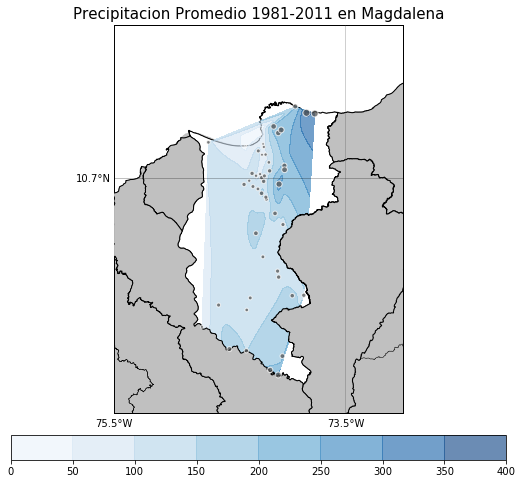

In [16]:
#Se importan las librerias
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from matplotlib.mlab import griddata
import shapefile  # used to read my shapefiles
from matplotlib.patches import Polygon # used to import Polygon
from matplotlib.collections import PatchCollection # also used to cut boundaries

# Normalize Function
from matplotlib.colors import Normalize
norm = Normalize()

# Se establece el archivo de entrada
data = pd.read_csv('C:/Users/verit/Documents/Datos para la tesis/Magdalena/SN12_PTPM.csv')

#Se establece el tamaño de la grafica
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

#Se define la extensión del mapa
lllat = 8.7
urlat = 12
lllon = -75.5
urlon = -73

#Se establece instancia de Basemap
m = Basemap(projection = 'merc',
            llcrnrlat = lllat,
            urcrnrlat = urlat,
            llcrnrlon = lllon,
            urcrnrlon = urlon,
            resolution = 'f')

# Se transforma coordenadas lon / lat a proyecciones del mapa
data['projected_lon'], data['projected_lat'] = m(*(data.Longitud.values, data.Latitud.values))

# grid data
numcols, numrows = 1000, 1000
xi = np.linspace(data['projected_lon'].min(), data['projected_lon'].max(), numcols)
yi = np.linspace(data['projected_lat'].min(), data['projected_lat'].max(), numrows)
xi, yi = np.meshgrid(xi, yi)

# interpolate
x, y, z = data['projected_lon'].values, data['projected_lat'].values, data.Valor.values
zi = griddata(x, y, z, xi, yi)

# load the shapefile, use the name 'states' 
m.readshapefile(r"C:\Users\verit\Documents\Datos para la tesis\Santander\MGN2017_00_COLOMBIA\ADMINISTRATIVO\MGN_DPTO_POLITICO",name='states',drawbounds=True)

#apply mask nearest states 
state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['DPTO_CNMBR'])

# get Santander and draw the filled polygon
seg1 = m.states[state_names.index('LA GUAJIRA')]
seg2 = m.states[state_names.index('CESAR')]
seg3 = m.states[state_names.index(u'ATL\xc1NTICO')]
seg4 = m.states[state_names.index(u'BOL\xcdVAR')]
seg5 = m.states[state_names.index('MAGDALENA')]

#poly = Polygon(seg, facecolor='white',edgecolor='black', zorder=17)
poly1 = Polygon(seg1)
poly2 = Polygon(seg2)
poly3 = Polygon(seg3)
poly4 = Polygon(seg4)
poly5 = Polygon(seg5,facecolor='white',edgecolor='black', zorder=2)
ax.add_patch(poly5)

ax.add_collection(PatchCollection([poly1,poly2,poly3,poly4], \
                                   zorder=4, \
                                   facecolor='#C0C0C0', \
                                   edgecolor='black' ) )
# draw map details
m.drawmapboundary(fill_color = 'white')
m.fillcontinents(color='#C0C0C0', lake_color='#7093DB',zorder=1)

m.drawparallels(
    np.arange(lllat, urlat, 2.),
    color = 'black', linewidth = 0.5,
    zorder=6,
    labels=[True, False, False, False])
m.drawmeridians(
    np.arange(lllon, urlon, 2.),
    color = '0.25', linewidth = 0.5,
    zorder=6,
    labels=[False, False, False, True])

# contour plot (color: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)
con = m.contourf(xi, yi, zi, zorder=3, alpha=0.6, cmap='Blues') 

# scatter plot
m.scatter(
    data['projected_lon'],
    data['projected_lat'],
    color='#545454',
    edgecolor='#ffffff',
    alpha=.75,
    s=50 * norm(data.Valor.values),
    cmap='Blues',
    ax=ax,
    vmin=zi.min(), vmax=zi.max(), zorder=5) #points stations

# agregar barra de color y titulo
cbar = plt.colorbar(con, orientation='horizontal', fraction=.057, pad=0.05)
plt.title("Precipitacion Promedio 1981-2011 en Magdalena",fontsize=15)

#agregar nombre departamentos alrededor
#plt.text(7.7,-74.5, 'Bolivar', fontsize=12);

plt.show()
